In [4]:
import pandas as pd

In [5]:
# Load the benchmark
benchmark_path = "../digits_benchmark_results.csv"

benchmark = pd.read_csv(benchmark_path) 

In [6]:
from collections import defaultdict

def get_performance(dataframe, variation):
    """ Collects performance data from the given Pandas dataframe """
    
    var_data = dataframe[dataframe['variation'] == variation]
    
    # Average until the counter resets
    runtimes = defaultdict(list)
    for _, row in var_data.iterrows():
        # Simply add the runtimes and cputimes to the correct dict under the correct thread
        runtimes[row["num_threads"]].append(row["runtime"])

    # Take the average
    runtimes = { thread : sum(times) / len(times) for thread, times in runtimes.items() }
    
    return runtimes

In [17]:
# Collect the average of all sequential data
seq_runtimes = get_performance(benchmark, "sequential")
seq_runtimes = seq_runtimes["-"]
cuda_runtimes = get_performance(benchmark, "CUDA_GPU1")
cuda_runtimes = cuda_runtimes["-"]

print(seq_runtimes, cuda_runtimes)

87.09423499999998 14.6884976


In [54]:
import matplotlib.pyplot as plt

def plot_performance(benchmark, seq_data, cuda_data):
    #""" Here, the data is actually plotted """
    
    # Plot the runtimes in a subplot
    
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots(2, 4, sharey=False, figsize=(20,10))
    threads = [2, 4, 8, 16, 32]
    shared_axes = None
    prev_ax = None
    for i in range(8):
        x = i % 4
        y = i // 4
        
        ax1 = ax[y, x]
        
        # Share this axis with the previous one
        if shared_axes is None:
            shared_axes = ax1.get_shared_y_axes()
        else:
            shared_axes.join(prev_ax, ax1)
        prev_ax = ax1
        
        # Acquire this variation's performance stats
        variation = f"OMP_CPU{i + 1}"
        data = get_performance(benchmark, f"{variation}")
        
        ax1.set_title(f"Runtimes for {variation}")
        ax1.set_xlabel("Number of threads")
        ax1.set_xticks(range(len(threads)))
        ax1.set_xticklabels(threads)
        if x == 0: ax1.set_ylabel("Runtime (seconds)")
        ln1 = ax1.plot(range(len(threads)), [seq_data for t in threads], '--', label=f"sequential")
        if i == 3:
            ax1.plot(range(len(threads)), [data["2"] for t in threads], '-')
        else:
            ln2 = ax1.plot(range(len(threads)), [data[str(t)] for t in threads], '-o', label=f"OpenMP")
        ln3 = ax1.plot(range(len(threads)), [cuda_data for t in threads], '--', label=f"CUDA")
        ax1.grid()
        
        lns = [ln1[0], ln2[0], ln3[0]]
        lbs = [ln.get_label() for ln in lns]
        fig.legend(lns, lbs, loc="upper center", ncol=len(lns))
    
    plt.subplots_adjust(top=0.9, hspace=0.3)
    fig.savefig("plots/digits_benchmark.pdf", bbox_inches='tight')

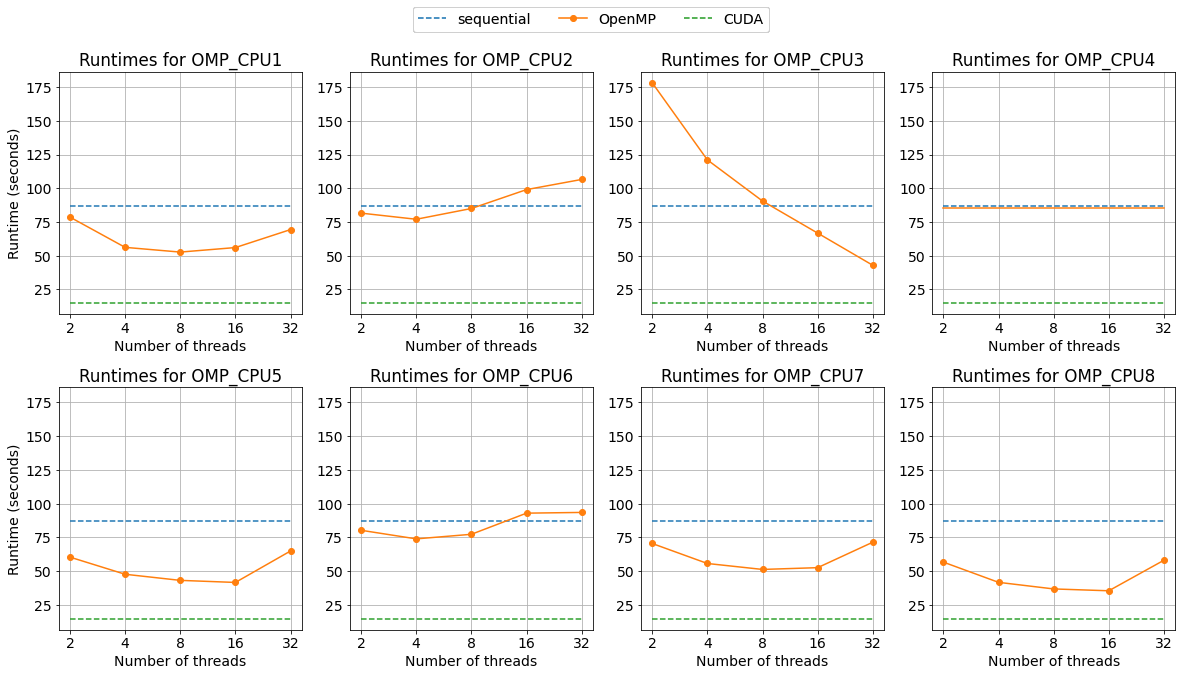

In [55]:
plot_performance(benchmark, seq_runtimes, cuda_runtimes)

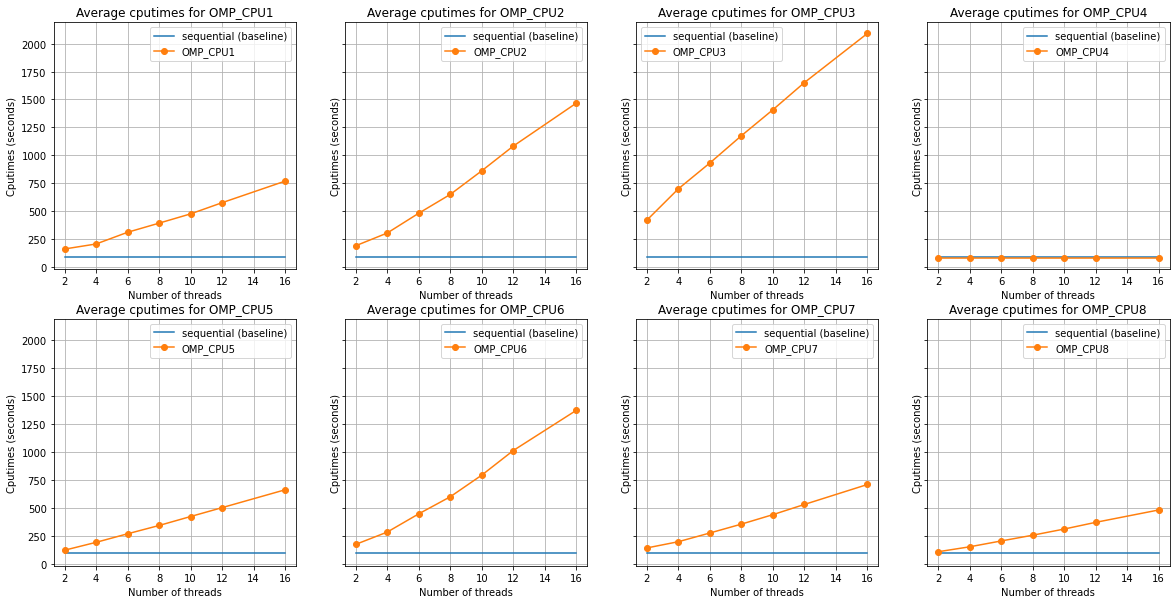

In [7]:
plot_performance(1, benchmark, (baseline_runtimes, baseline_cputimes))

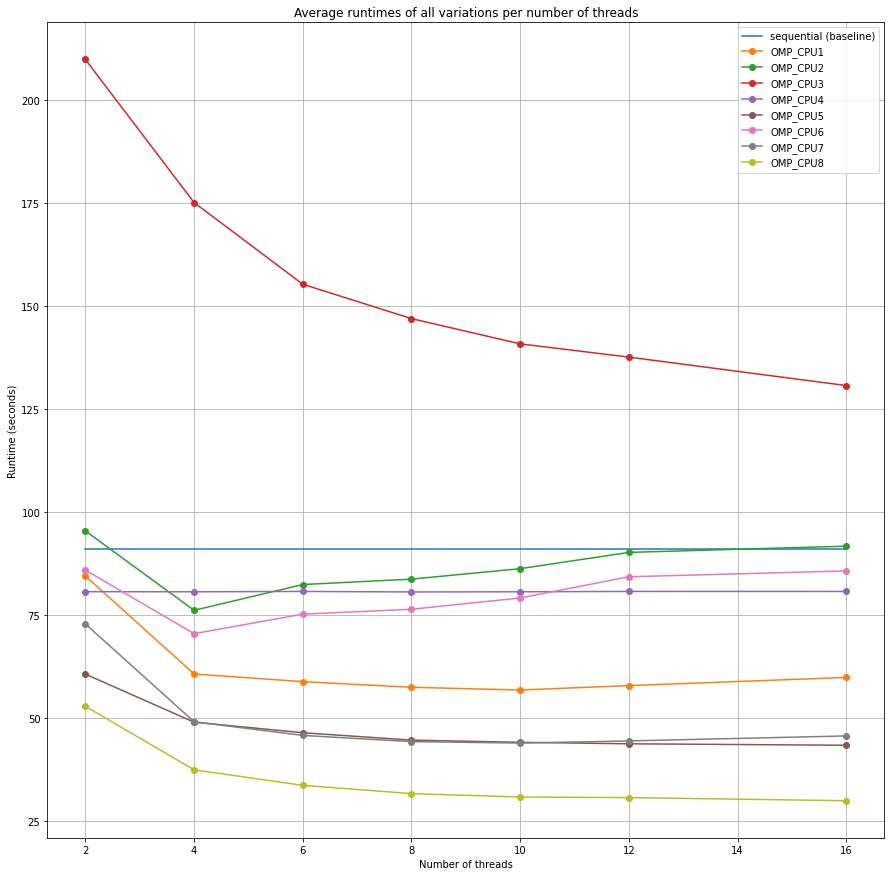

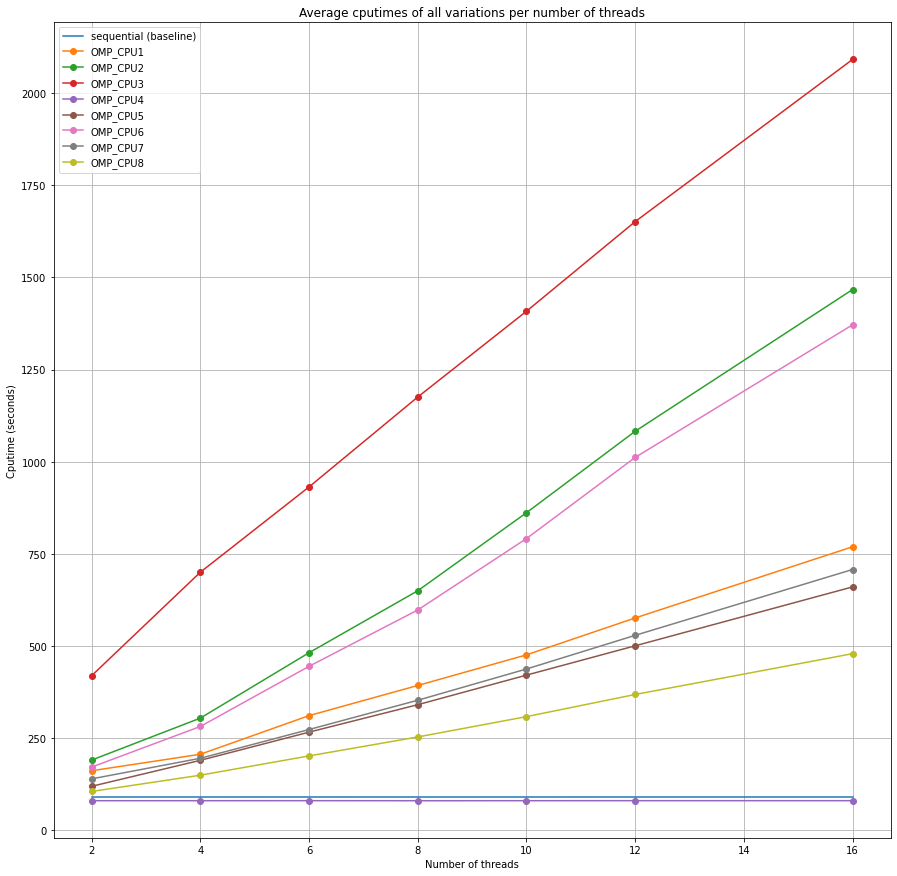

In [8]:
# Plot a general one for the runtimes
plt.figure(figsize=(15,15))
plt.title(f"Average runtimes of all variations per number of threads")
plt.xlabel("Number of threads")
plt.ylabel("Runtime (seconds)")
xs = [2, 4, 6, 8, 10, 12, 16]
plt.plot(xs, [baseline_runtimes for x in xs], label=f"sequential (baseline)")
for i in range(8):
    plt.plot(xs, [get_performance(benchmark, f"OMP_CPU{i + 1}")[0][str(x)] for x in xs], '-o', label=f"OMP_CPU{i + 1}")
plt.legend()
plt.grid()
plt.show()

# Plot a general one for the cputimes
plt.figure(figsize=(15,15))
plt.title(f"Average cputimes of all variations per number of threads")
plt.xlabel("Number of threads")
plt.ylabel("Cputime (seconds)")
xs = [2, 4, 6, 8, 10, 12, 16]
plt.plot(xs, [baseline_cputimes for x in xs], label=f"sequential (baseline)")
for i in range(8):
    plt.plot(xs, [get_performance(benchmark, f"OMP_CPU{i + 1}")[1][str(x)] for x in xs], '-o', label=f"OMP_CPU{i + 1}")
plt.legend()
plt.grid()
plt.show()